### Importing the libraries 

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('Comcast_telecom_complaints_data.csv')
data1

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


In [3]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [4]:
data1['Date'] = pd.to_datetime(data1['Date'])

In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Ticket #                     2224 non-null   object        
 1   Customer Complaint           2224 non-null   object        
 2   Date                         2224 non-null   datetime64[ns]
 3   Date_month_year              2224 non-null   object        
 4   Time                         2224 non-null   object        
 5   Received Via                 2224 non-null   object        
 6   City                         2224 non-null   object        
 7   State                        2224 non-null   object        
 8   Zip code                     2224 non-null   int64         
 9   Status                       2224 non-null   object        
 10  Filing on Behalf of Someone  2224 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
m

In [6]:
data1['Month'] = data1['Date'].dt.month_name()

In [7]:
data1.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month
0,250635,Comcast Cable Internet Speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April
1,223441,Payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April
2,242732,Speed and Service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May
4,307175,Comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May


In [8]:
data1['Date'].value_counts()

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-05-24      7
2015-05-02      7
2015-04-05      6
2015-04-11      5
2015-05-03      5
Name: Date, Length: 91, dtype: int64

In [9]:
dates=data1.groupby('Date').count()['Ticket #']

In [10]:
daily = pd.DataFrame(dates).reset_index()

In [11]:
daily.head()

,Date,Ticket #
0,2015-04-01,18
1,2015-04-02,27
2,2015-04-03,15
3,2015-04-04,12
4,2015-04-05,6


<AxesSubplot:xlabel='Date'>

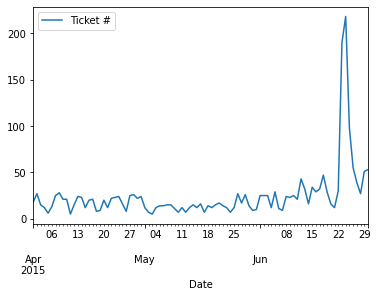

In [12]:
daily.plot(x="Date",y="Ticket #",kind="line")

In [13]:
months = data1.groupby('Month').count()['Ticket #']

In [14]:
months

Month
April     545
June     1280
May       399
Name: Ticket #, dtype: int64

In [15]:
months_df = pd.DataFrame(months).reset_index()

In [16]:
months_df.head()

,Month,Ticket #
0,April,545
1,June,1280
2,May,399


In [17]:
import matplotlib.pyplot as plt

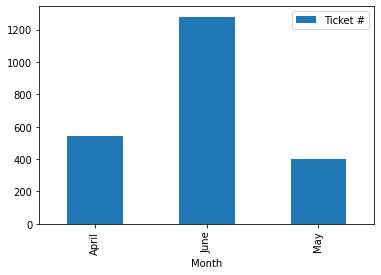

In [18]:
months_df.plot(x="Month",y="Ticket #",kind="bar")
plt.show()

In [19]:
data1['Customer Complaint'] = data1["Customer Complaint"].apply(lambda x :str(x).lower())

<AxesSubplot:>

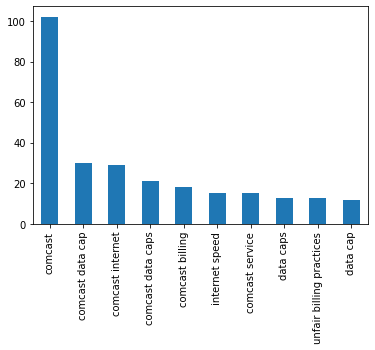

In [20]:
data1['Customer Complaint'].value_counts()[:10].plot.bar()

In [21]:
data1['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [22]:
data1["New_status"] =  ['Open' if st == "Open" or st=="Pending" else "Closed" for st in data1['Status']]

In [23]:
data1["New_status"]

0       Closed
1       Closed
2       Closed
3         Open
4       Closed
         ...  
2219    Closed
2220    Closed
2221    Closed
2222    Closed
2223      Open
Name: New_status, Length: 2224, dtype: object

In [24]:
data1.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Month,New_status
0,250635,comcast cable internet speeds,2015-04-22,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,April,Closed
1,223441,payment disappear - service got disconnected,2015-04-08,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,April,Closed
2,242732,speed and service,2015-04-18,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,April,Closed
3,277946,comcast imposed a new usage cap of 300gb that ...,2015-05-07,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,May,Open
4,307175,comcast not working and no service to boot,2015-05-26,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,Closed


In [25]:
data1["New_status"].unique()

array(['Closed', 'Open'], dtype=object)

In [26]:
state_complaint = data1.groupby(['State', 'New_status']).size().unstack().fillna(0)

In [27]:
state_complaint

New_status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


<AxesSubplot:xlabel='State'>

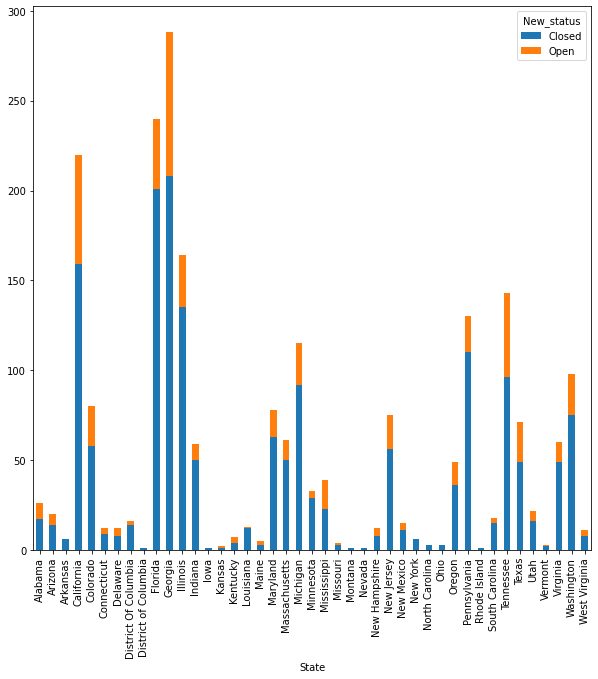

In [28]:
state_complaint.plot.bar(stacked = 'True', figsize= (10,10))

### State having maximum complaints

In [29]:
data1.groupby(["State"]).size().sort_values(ascending = False)[:5]

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

### Finding the state having the highest percentage of unresolved complaints

In [30]:
unresolved_complaints = data1.groupby(['State', "New_status"]).size().unstack().sort_values(by = "Open", ascending = False)

In [31]:
unresolved_complaints['Unresolved_cmp_predict'] = unresolved_complaints["Open"]/unresolved_complaints["Open"].sum()*100

In [32]:
unresolved_complaints

New_status,Closed,Open,Unresolved_cmp_predict
State,,,
Georgia,208.0,80.0,15.473888
California,159.0,61.0,11.798839
Tennessee,96.0,47.0,9.090909
Florida,201.0,39.0,7.543520
Illinois,135.0,29.0,5.609284
Michigan,92.0,23.0,4.448743
Washington,75.0,23.0,4.448743
Colorado,58.0,22.0,4.255319
Texas,49.0,22.0,4.255319


### Percentage of complaints resolved till date, which were received through the internet and customer care calls

In [33]:
resolved_complaints = data1.groupby(["Received Via", "New_status"]).size().unstack()

In [34]:
resolved_complaints["Resolved"] = resolved_complaints["Closed"]/resolved_complaints["Closed"].sum()*100

In [35]:
resolved_complaints["Resolved"]

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Resolved, dtype: float64

### Finding the maximum complaint types

In [36]:
complaint_types = data1["Customer Complaint"].unique()
complaint_types

array(['comcast cable internet speeds',
       'payment disappear - service got disconnected',
       'speed and service', ...,
       'comcast monthly billing for returned modem',
       'extremely unsatisfied comcast customer',
       'comcast, ypsilanti mi internet speed'], dtype=object)

In [37]:
complaint_type = data1['Customer Complaint'].value_counts()

In [38]:
complaint_type.head()

comcast              102
comcast data cap      30
comcast internet      29
comcast data caps     21
comcast billing       18
Name: Customer Complaint, dtype: int64

In [39]:
internet_issues1 = data1[data1["Customer Complaint"].str.contains(("network"))].count()

In [41]:
internet_issues2 = data1[data1["Customer Complaint"].str.contains("data")].count()

In [42]:
internet_issues3 = data1[data1["Customer Complaint"].str.contains("speed")].count()

In [43]:
internet_issues4 = data1[data1["Customer Complaint"].str.contains("internet")].count()

In [44]:
billing_issues1 = data1[data1["Customer Complaint"].str.contains("billing")].count()

In [46]:
billing_issues2 = data1[data1["Customer Complaint"].str.contains("charges")].count()

In [47]:
billing_issues3 = data1[data1["Customer Complaint"].str.contains("bills")].count()

In [48]:
service_issues1 = data1[data1["Customer Complaint"].str.contains("service")].count()

In [49]:
service_issues2 = data1[data1["Customer Complaint"].str.contains("customer")].count()

In [50]:
total_internet_issues = internet_issues1 + internet_issues2 + internet_issues3 + internet_issues4

In [51]:
total_internet_issues

Ticket #                       945
Customer Complaint             945
Date                           945
Date_month_year                945
Time                           945
Received Via                   945
City                           945
State                          945
Zip code                       945
Status                         945
Filing on Behalf of Someone    945
Month                          945
New_status                     945
dtype: int64

In [52]:
total_billing_issues = billing_issues1 + billing_issues2 + billing_issues3

In [53]:
total_billing_issues

Ticket #                       378
Customer Complaint             378
Date                           378
Date_month_year                378
Time                           378
Received Via                   378
City                           378
State                          378
Zip code                       378
Status                         378
Filing on Behalf of Someone    378
Month                          378
New_status                     378
dtype: int64

In [54]:
total_service_issue = service_issues1 + service_issues2
total_service_issue

Ticket #                       584
Customer Complaint             584
Date                           584
Date_month_year                584
Time                           584
Received Via                   584
City                           584
State                          584
Zip code                       584
Status                         584
Filing on Behalf of Someone    584
Month                          584
New_status                     584
dtype: int64

In [56]:
data1["Customer Complaint"].shape

(2224,)

In [57]:
other_issues = 2224 - (total_internet_issues + total_service_issue + total_billing_issues)
other_issues

Ticket #                       317
Customer Complaint             317
Date                           317
Date_month_year                317
Time                           317
Received Via                   317
City                           317
State                          317
Zip code                       317
Status                         317
Filing on Behalf of Someone    317
Month                          317
New_status                     317
dtype: int64

### From this we can conclude that internet issues are more